<a href="https://colab.research.google.com/github/Ziedny28/ML/blob/master/Kuis2-create%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/ML-Resources/testing_data')

In [4]:
import cv2
import numpy as np
from tqdm import tqdm
import os

# Define your desired image width and height
your_image_width = 64
your_image_height = 64

data = []
labels = []

# Assuming the code is in the directory where the images are located
current_directory = '/content/drive/My Drive/ML-Resources/testing_data'

for folder_name in os.listdir(current_directory):
    folder_path = os.path.join(current_directory, folder_name)

    for img_name in tqdm(os.listdir(folder_path)):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (your_image_width, your_image_height))
        data.append(img)
        labels.append(folder_name)

data = np.array(data)
labels = np.array(labels)


100%|██████████| 28/28 [00:08<00:00,  3.38it/s]


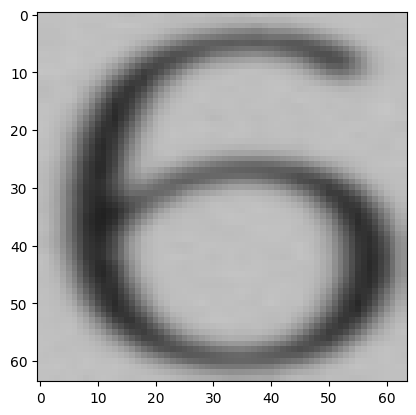

In [5]:
plt.imshow(data[0])

In [6]:
labels[0]

'6'

In [7]:
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Preprocess data
# data = data.astype('float32') / 255.0  # Normalize pixel values to be between 0 and 1
# data = data.reshape((data.shape[0], your_image_width, your_image_height, 3))  # Reshape data to match input shape

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# datagen.fit(X_train)  # Fit the data augmentation pipeline to the training data

# # Build CNN Model
# model = Sequential()

# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(your_image_width, your_image_height, 3)))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model with data augmentation
# batch_size = 32
# history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
#                     steps_per_epoch=len(X_train) // batch_size,
#                     epochs=20,
#                     validation_data=(X_test, y_test),
#                     shuffle=True)

# # Save the model to an HDF5 file
# model.save('/content/drive/My Drive/ML-Resources/my_model.h5')


#### Bawah ini ERRRORR


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:

# Preprocess data
data = data.astype('float32') / 255.0  # Normalize pixel values to be between 0 and 1
data = data.reshape((data.shape[0], your_image_width, your_image_height, 3))  # Reshape data to match input shape

In [10]:
# Assuming you are using one-hot encoding
label_binarizer = LabelBinarizer()
labels_one_hot = label_binarizer.fit_transform(labels)
labels_one_hot = tf.keras.utils.to_categorical(labels_one_hot, num_classes=36)  # Assuming 36 classes for binary classification

# Convert one-hot encoded labels to a single column of probabilities
y_train = labels_one_hot[:, 0]  # Assuming binary classification
y_test = labels_one_hot[:, 0]

In [11]:
# Convert labels to binary format (0 or 1)
y_train_binary = np.argmax(y_train, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, y_train_binary, test_size=0.2, random_state=42)

In [12]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
datagen.fit(data)  # Fit the data augmentation pipeline to the reshaped training data

In [14]:
  # Build CNN Model
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(your_image_width, your_image_height, 3)))
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(2, 2))

  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))  # Using sigmoid for binary classification

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  # Train the model with data augmentation
  batch_size = 32
  history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                      steps_per_epoch=len(X_train) // batch_size,
                      epochs=20,
                      validation_data=(X_test, y_test),
                      shuffle=True)

  # Save the model to an HDF5 file
  model.save('/content/drive/My Drive/ML-Resources/my_model.h5')

Epoch 1/20
25/25 [==============================] - 14s 63ms/step - loss: 0.2299 - accuracy: 0.9512 - val_loss: 0.1259 - val_accuracy: 0.9803
Epoch 2/20
25/25 [==============================] - 2s 84ms/step - loss: 0.1383 - accuracy: 0.9718 - val_loss: 0.1077 - val_accuracy: 0.9803
Epoch 3/20
25/25 [==============================] - 1s 57ms/step - loss: 0.1413 - accuracy: 0.9692 - val_loss: 0.1095 - val_accuracy: 0.9803
Epoch 4/20
25/25 [==============================] - 1s 49ms/step - loss: 0.1455 - accuracy: 0.9705 - val_loss: 0.1051 - val_accuracy: 0.9803
Epoch 5/20
25/25 [==============================] - 1s 48ms/step - loss: 0.1572 - accuracy: 0.9692 - val_loss: 0.1062 - val_accuracy: 0.9803
Epoch 6/20
25/25 [==============================] - 1s 48ms/step - loss: 0.1407 - accuracy: 0.9718 - val_loss: 0.1021 - val_accuracy: 0.9803
Epoch 7/20
25/25 [==============================] - 1s 50ms/step - loss: 0.1316 - accuracy: 0.9730 - val_loss: 0.1234 - val_accuracy: 0.9803
Epoch 8/20
2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
